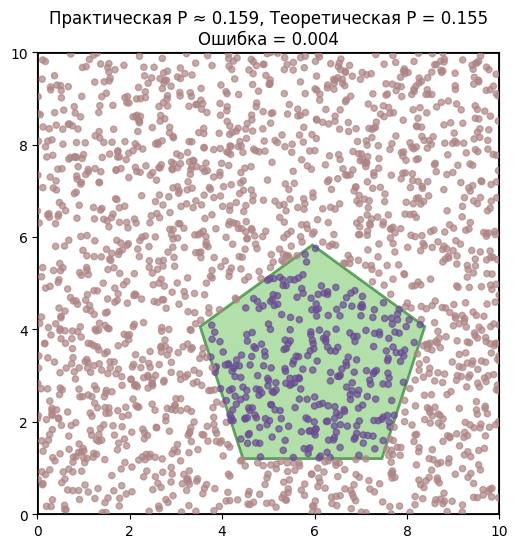

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon, Rectangle
from matplotlib.path import Path
import numpy as np

# Генерация правильного пятиугольника
def generate_pentagon(N):
    center = np.random.uniform(2, N-2, 2)
    radius = np.random.uniform(1, min(center[0], center[1], N-center[0], N-center[1]))
    angles = np.linspace(0, 2*np.pi, 6)[:-1] + np.pi/2
    points = np.vstack((center[0] + radius * np.cos(angles),
                        center[1] + radius * np.sin(angles))).T
    return points

# Площадь пятиугольника
def pentagon_area(pentagon):
    x, y = pentagon[:,0], pentagon[:,1]
    return 0.5 * abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))

# Теоретическая вероятность
def theoretical_probability(pentagon, N):
    S_pent = pentagon_area(pentagon)
    S_square = N ** 2
    return S_pent / S_square

# Эксперимент
def simulate_experiment(pentagon, N, size=1000):
    X = np.random.uniform(0, N, size)
    Y = np.random.uniform(0, N, size)
    points = np.vstack((X, Y)).T
    path = Path(pentagon)
    mask = path.contains_points(points)
    return mask, points

# Визуализация
def visualize(pentagon, N, mask, points, prob_prac, prob_theor):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(0, N)
    ax.set_ylim(0, N)
    ax.set_aspect("equal")

    # квадрат
    ax.add_patch(Rectangle((0, 0), N, N, fill=False, edgecolor='black', linewidth=2))
    # пятиугольник
    ax.add_patch(Polygon(pentagon, facecolor='#a0d995', edgecolor='#3e8e41', linewidth=2, alpha=0.8))

    # точки
    ax.scatter(points[:,0], points[:,1],
               c=['#6a4c93' if m else "#ae8585" for m in mask], s=20, alpha=0.7)

    ax.set_title(f"Практическая P ≈ {prob_prac:.3f}, Теоретическая P = {prob_theor:.3f}\n"
                 f"Ошибка = {abs(prob_theor - prob_prac):.3f}", fontsize=12)
    plt.show()

# Параметры
N = 10
dots_count = 2000
pentagon = generate_pentagon(N)

# Запуск
prob_theor = theoretical_probability(pentagon, N)
mask, points = simulate_experiment(pentagon, N, dots_count)
prob_prac = np.sum(mask) / dots_count
visualize(pentagon, N, mask, points, prob_prac, prob_theor)
